In [2]:
import math
import json
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import sys
sys.path.append("../")

from unique_hypercube_size import *

%load_ext autoreload
%autoreload 2


# Create a zoo of graphs

Datasets:

`../results/cap_data_m6_k4_t20___2018-08-15_14:50:36.p`
 - exponential scales, factor $1.4$
 - Random $A$, no constraints
 - **M**: $1 - 6$
 - **K**: $1 - 4$
 - **T**: $20$
 
`../results/cap_data_m6_k4_t50___2018-08-15_15:08:06.p`
 - exponential scales, factor $1.4$
 - Random $A$, no constraints
 - **M**: $1 - 6$
 - **K**: $1 - 4$
 - **T**: $50$
 
 `../results/cap_data_m12_k6_t1_shuff_A__2018-09-06_14:16:59.p`
 - exponential scales, factor $1.4$
 - Random $A$, no constraints
 - **M**: $1 - 12$
 - **K**: $1 - 6$
 - **T**: $1$
 
 `../results/cap_data_m6_k4_t50_uni_scales__2018-08-29_16:16:57.p`
 - uniform scales around $1$
 - ...
 
`../results/cap_data_m6_k4_t20_dec_A__2018-08-29_17:31:04.p`
 - exponential scales, factor $1.4$
 - "decomposed" A

In [3]:
"""
    
    Load data if necessary
    
"""

filename = "../results/temp_phr.p"
# filename = "../results/cap_data_m12_k6_t1_shuff_A__2018-09-06_14:16:59.p" 
# filename = "../results/cap_data_m6_k4_t20___2018-08-15_14:50:36.p"
# filename = "../results/cap_data_m6_k4_t50___2018-08-15_15:08:06.p"
# filename="../results/cap_data_m6_k4_t20_dec_A__2018-08-29_17:31:04.p"
# filename="../results/cap_data_m6_k4_t50___2018-08-15_15:08:06.p"

with open(filename, 'r') as f:
    data = pickle.load(f)

    
width          = data["width"]
vol            = data["vol"]

emb_vol        = data["emb_vol"]
det_R          = data["det_R"] 
mean_width     = data["mean_width"]
mean_vol       = data["mean_vol"]
mean_emb_vol   = data["mean_emb_vol"]
mean_det_R     = data["mean_det_R"]
phr = np.array(data["phase_resolution"])
ms = data["ms"]
ks = data["ks"]

k_max = max(ks)
m_max = max(ms)


std_width   = np.std(width, axis=2)
std_vol   = np.std(vol, axis=2)
std_emb_vol = np.std(emb_vol, axis=2)
std_det_R   = np.std(det_R, axis=2)


# Maximum envorinment sizes

- The units in the environment are measured with respect to the smallest scale, ie. the smallest scale corresponds to $1$ unit. 
- That means if we assume that the smallest scale is about $30$cm we have to multiply the computed width $w$ by $30$cm to get the environment width in cm.


In [4]:
print phr

[ 0.4   0.35  0.3   0.25  0.2   0.15  0.1   0.05]


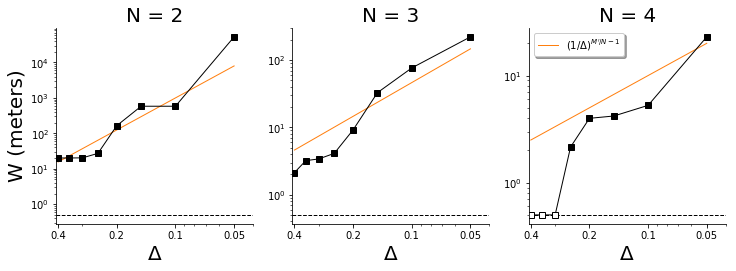

In [48]:




fig, ax = plt.subplots(1, 3, 
                       figsize=(3.*k_max, 4), 
                       sharey=False);
# plt.suptitle("Max sidelength of cubic environment", y=1.)
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=None,
                wspace=None, hspace=None)



m=5



ax[0].set_ylabel("W (meters)")
ax[0].yaxis.label.set_fontsize(20)
for k in range(2,k_max+1):
    i = k - 1 - 1
    ax[i].set_title("N = {}".format(k))
    ax[i].title.set_fontsize(20)

    ax[i].set_xlabel("$\Delta$")
    ax[i].set_yscale("log")
#     ax[i].set_xticks(phr)
    ax[i].set_xscale("log")
    ticks = [0.4, 0.2, 0.1, 0.05]
    ax[i].set_xticks(ticks)
    ax[i].set_xticklabels(ticks)

    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].xaxis.label.set_fontsize(20)
    ax[i].set_xlim(phr[0]+0.01, phr[-1]-0.01)

    
    asym = (1./phr)**(1.6*m/float(k) - 1. )
    ax[i].plot(phr, asym, 
             c="C1", 
#              marker="s", 
#              markeredgewidth=1,
#              markersize=8,
             linestyle="-",
             markeredgecolor="red",
             linewidth=1, label="$(1/\Delta)^{M'/N - 1}$") 
    
    
    mu = mean_width[:,m-1,k-1]
    
    ax[i].plot(phr, mu, 
             c="black", 
#              marker="s", 
#              markeredgewidth=1,
#              markersize=8,
             linestyle="-",
#              markeredgecolor="white",
             linewidth=1) 
    
    valid = mu > 0.5
    ax[i].plot(phr[valid], mu[valid], 
             c="black", 
             marker="s", 
#              markeredgewidth=1,
#              markersize=8,
             linestyle="None",
#              markeredgecolor="white",
             linewidth=1) 
    
    ax[i].axhline(y=0.5, c="black", linestyle="--", linewidth=1.)
    
    invalid = mu <= 0.5
    ax[i].plot(phr[invalid], mu[invalid], 
             c="white", 
             marker="s", 
             markeredgewidth=1,
#              markersize=8,
             linestyle="None",
             markeredgecolor="black",
             linewidth=1) 
    




ax[-1].legend(fontsize=10, fancybox=True, shadow=True)
# plt.show()
plt.savefig("capacity_delta.tiff", format="tiff", dpi = 300)

# $k$-dimensional Volume of embedded unit cube

- The volume is computed as $\det(R)$, where $R$ is coming from a $QR$-decomposition of $A$, i.e. $A=QR$, with $Q\in \mathbb{R}^{2m \times k}$ satisfying $Q^TQ = I$.
- Think of the columns of $Q$ as an orthonormal basis of the image of $A$.

# $(2m - k)$-dimensional Volume of fibre orthogonal to embedded cube

- The volume of the normal fibre is computed as $\rho^{2m - k},$ where $\rho$ is the "phase resolution" (here $0.2$)

# $m$-dimensional Volume of thickened embedded unit cube

- The volume is computed as $|\det(R)| \cdot \rho^{2m -k }$.

# Capacity in dependence of sidelength

# Capacity in terms of number of environments